In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv(r'C:\Users\SHASHANK\OneDrive\Desktop\IntelliFraud\data\Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Handle missing values, outliers
df.isnull().sum()
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: xlabel='isFraud', ylabel='count'>

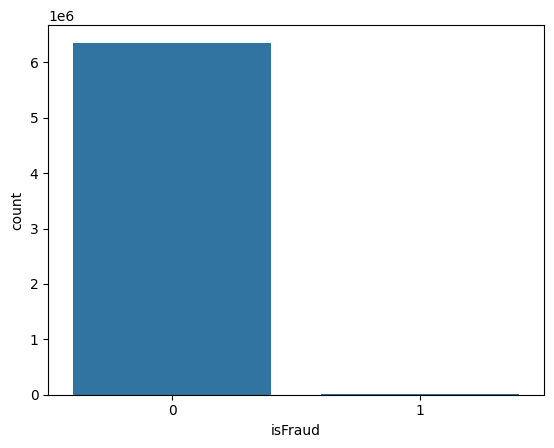

In [7]:
# Explore relationships
sns.countplot(x='isFraud', data=df)

In [14]:
# 1. Load & Sample for Performance

# Sample only 10% of data for speed
df_sample = df.sample(frac=0.1, random_state=42)
# Optional: Print class distribution
print("Class distribution:\n", df_sample['isFraud'].value_counts())

Class distribution:
 0    635445
1       817
Name: isFraud, dtype: int64


In [15]:
# 2. Encode Categorical Columns
df_encoded = df_sample.copy()
le = LabelEncoder()
df_encoded['type'] = le.fit_transform(df_encoded['type'])

In [16]:
# 3. Define Features and Target
X = df_encoded.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df_encoded['isFraud']

In [17]:
# 4. Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
# 5. Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    n_jobs=-1,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_jobs=-1,
                       random_state=42)

In [19]:
# 6. Predictions and Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127090
           1       0.42      0.88      0.57       163

    accuracy                           1.00    127253
   macro avg       0.71      0.94      0.78    127253
weighted avg       1.00      1.00      1.00    127253

ROC-AUC Score: 0.9941140692046166


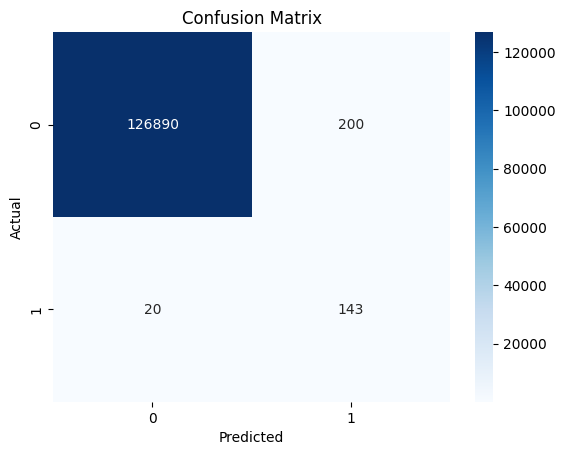

In [20]:
# 7. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

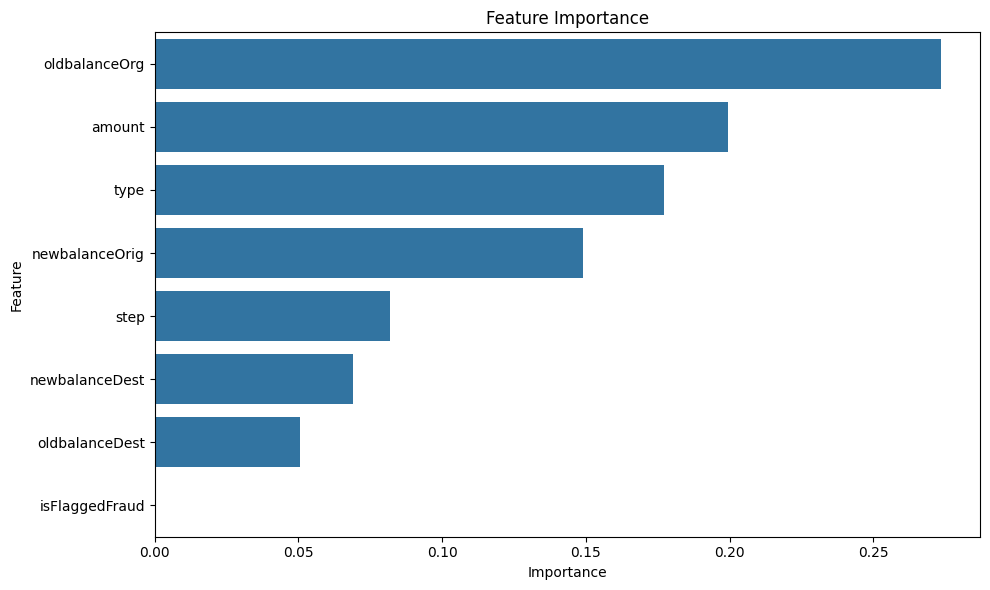

In [21]:
# 8. Feature Importance
importances = model.feature_importances_
features = X.columns
fi_df = pd.DataFrame({"Feature": features, "Importance": importances})
fi_df = fi_df.sort_values("Importance", ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.savefig("../images/feature_importance.png")
plt.show()

In [22]:
# Plot top features
importances = model.feature_importances_